In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os
import tiktoken
from torchtext import datasets
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
"""
ok so here's how this goes.

we have an input sequence.
we tokenize the input sequence -> list of tokens
embedding: we turn the list of tokens into a list of embedding: it is a matrix now (seq_length, d_model)
    in the paper i think embedding_dim is 512 (d_model)
positional encoding: each token embedding has positional encoding added to it.


ok now time for multi head attention (bunch of these in parallel)

LINEAR

now we get Q, K, V. we perform linear transformation on input_embeddings (experiment with biases)
W_q_ (d_model, d_k)      W_k (d_model, d_k)      W_v (d_model, d_v)
Q = matmul(input_embeddings, W_q)            (seq_length, d_k)
K = matmul(input_embeddings, W_k)            (seq_length, d_k)
V = matmul(input_embeddings, W_v)            (seq_length, d_v)
we do this for every single attention head (unique weights for each)

ok now time for multi head attention (bunch of these in parallel)

LINEAR

SCALED DOT-PRODUCT ATTENTION

attn = tf.matmul(Q, tf.transpose(K))/tf.sqrt(d_k)
if mask:
    mask
attn = tf.matmul(tf.softmax(attn), V)


ok these have all run in parallel how do we concatenate them? 
batched matrix operations

concat

multiply by weight matrix to get back to regular dims


"""

"""


"""

'\n\n\n'

In [ ]:
"""
https://huggingface.co/datasets/wmt14
https://paperswithcode.com/dataset/wmt-2014

the tokenizer:
https://github.com/openai/tiktoken

each batch contained ~25000 source tokens, 25000 target tokens. batched together by approximate sequence length


trained with 8 nvidia P100 gpus ~~128 GB 
each training step took ~~0.4 seconds, trained for about 100,000 steps, so 12 hours


adam optimizer: 
beta_1 = 0.9
beta_2 = 0.98
epsilon = 10^-9


learning rate was varied over course of training according to formula
lrate = (1/sqrt(d_model)) * min((1/sqrt(step_num)), step_num * (warmup_steps^-1.5))

residual dropout:
added dropout to the output of each sublayer before add and norm.
figure out what it means to add dropout to the sum of embeddings and positional encodings.
p_drop = 0.1

figure out what label smoothing is, they use value of 0.1 for that



learn more about what you do around the inference stage, incorporate beam search.


"""

In [ ]:
"""
i need to enumerate all the weights that will get used in this 
enc embedding weights
dec embedding weights

(n copies) encoder block
end linear weights (still in multi-head attention) (h*d_v, d_model)
h copies of Q, K, V weights
W1, b1, W2, b2 for feed forward neural network module (applied to each position seperately and identically)
    max(0, x*W1 + b1)*W2 + b2 (check more on what dims are)
    


"""

In [89]:
"""
setup
"""

D_MODEL = 512
VOCAB_SIZE = 37000

embedding = nn.Embedding(VOCAB_SIZE, D_MODEL)

#initialize other weights later


In [ ]:
"""
tokenization
seperate for each language ofc
"""

"""
so i go through the text, start by having vocab of just chars. then, depending on how many merges are allowed,
(i'm just going to pick 10000 as vocab size) i have my vocab. set of vocabulary, maybe we associate each with number.

then each number can be associated with row of embedding matrix in the future.

i will get it up to 10000 and then save to pkl file.



so i iterate through dataset, collect all chars. first vocab.
"""




In [ ]:
"""
ok cool we assume that we have the tokenizer done. handle inputs now, make positional encoding
"""
#tok_in = torch.LongTensor([...]) #list of token ints for input

embedded_tokens = embedding(tok_in)



In [86]:
"""
right now i will create a positional encoding matrix function. this will output a matrix with dims (seq_length, D_MODEL)

might change this into function that adds the positional encoding to the embedded input, returns encoded
"""

def pos_encoding(seq_len, D_MODEL):
    #create the matrix of values, then put them into sin/cos depending on parity
    mat = np.array([[np.float64(p) / (10000 ** ((2*(np.float64(i)))/D_MODEL)) for i in np.arange(D_MODEL)] for p in np.arange(seq_len)])
    mat[:, ::2] = np.sin(mat[:, ::2])
    mat[:, 1::2] = np.cos(mat[:, 1::2])
    return torch.from_numpy(mat)

themat = pos_encoding(500, 512)
print(themat.size())

torch.Size([500, 512])


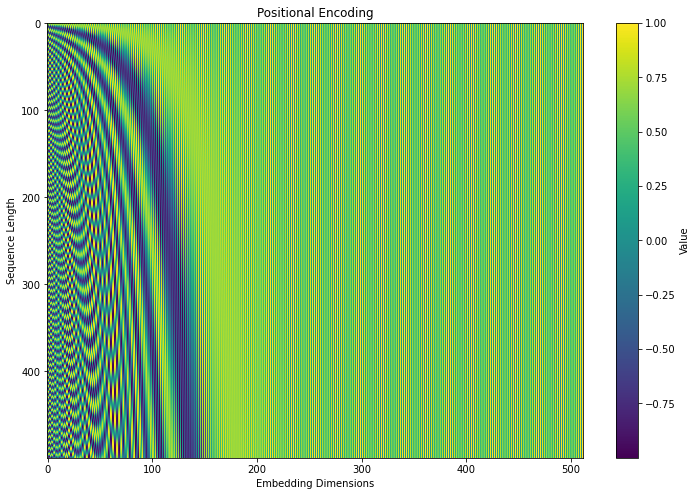

In [87]:
#THIS IS JUST FOR MAKING SURE THE POSITIONAL ENCODING LOOKS FINE
plt.figure(figsize=(12, 8))
plt.imshow(themat, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Positional Encoding')
plt.xlabel('Embedding Dimensions')
plt.ylabel('Sequence Length')
plt.show()